# WikiRag

## Overview 

Notebook used to evaluate the WikiRag class. 

## Prerequisistes

### A conda environment

For example: 
```
cd path/to/conda/dir
conda env create -f wiki_rag_notebooks.yaml
conda activate wiki_rag_notebooks
python -m ipykernel install --user --name wiki_rag_notebooks --display-name "wiki_rag_notebooks"
```

### A .env file

A .env file is necessary to store the OPENAI_API_KEY.
For example: 
```
OPENAI_API_KEY=sdHbc..&66dc
```

## How to evaluate a RAG application

The main elements to evaluate in a RAG application are as follows:
- **Retrieval**: This involves experimenting with different data processing strategies, embedding models, etc., and evaluating how they impact retrieval.
- **Generation**: Once you decide on the best settings for the retriever, this step involves experimenting with different LLMs to find the best completion model for the task.

For the sake of this nootebook we'll focus on the evaluation of the *Overall* aspect of our WikiRag Class. In the specific: 

- **Answer semantic similarity**: Measures the semantic similarity between the generated answer and the ground truth
- **Answer correctness**: Measures the accuracy of the generated answer compared to the ground truth

To read more about how the metrics are computed: [metrics](https://docs.ragas.io/en/stable/concepts/metrics/index.html).

In [1]:
# Import the wiki_rag package from path
import sys
sys.path.insert(1, "../")

In [2]:
from wiki_rag import WikiRag
import pandas as pd
from ragas.metrics import answer_similarity, answer_correctness
from datasets import Dataset
from ragas import evaluate
import os
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv

C:\Users\Mauro Andretta\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
load_dotenv(dotenv_path=os.path.expanduser("~/.env"))

True

## Evaluate the WikiRag class

#### Perfromances without Web Search

In [4]:
# Define the questions and their expanded correct answers
data = {
    "question": [
        "Quale città ospitò i primi Giochi Olimpici estivi dell’età moderna? In che anno?",
        "Quante volte i Giochi Olimpici estivi sono stati ospitati in Francia (Parigi 2024 incluso)?",
        "Quanto tempo è passato dall’ultima volta che Parigi ha ospitato le olimpiadi estive?",
        "La prima edizione dei Giochi Olimpici invernali è avvenuta prima della prima edizione dei Giochi Olimpici estivi?",
        "L’arrampicata sportiva non è uno sport olimpico: vero o falso?",
        "Quale è il numero medio di ori olimpici per edizione per l’Italia?",
        "Chi è l’ultima vincitrice dei 100 metri piani? Con quale tempo?",
        "In quale anno si sono tenuti i primi Giochi Olimpici invernali?",
        "Quanti ori olimpici ha vinto l'Italia alle Olimpiadi di Tokyo 2020?",
        "Chi è stato il fondatore del Comitato Olimpico Internazionale?",
        "Quale città ospiterà i Giochi Olimpici estivi del 2028?",
        "In quale anno le donne hanno partecipato per la prima volta ai Giochi Olimpici?"
    ],
    "ground_truth": [
        "La città che ospitò i primi Giochi Olimpici estivi dell'età moderna fu Atene, in Grecia, nel 1896. Questi Giochi segnarono la rinascita del movimento olimpico dopo secoli di inattività.",
        "I Giochi Olimpici estivi sono stati ospitati in Francia tre volte, includendo Parigi 2024. Le precedenti edizioni si sono tenute a Parigi nel 1900 e nel 1924.",
        "Sono passati 100 anni dall'ultima volta che Parigi ha ospitato le Olimpiadi estive, che si sono tenute nel 1924. Parigi ospiterà di nuovo i Giochi nel 2024.",
        "No, la prima edizione dei Giochi Olimpici invernali non è avvenuta prima della prima edizione dei Giochi Olimpici estivi. I Giochi Olimpici estivi iniziarono nel 1896, mentre i primi Giochi Olimpici invernali si svolsero nel 1924 a Chamonix, Francia.",
        "Falso. L'arrampicata sportiva è diventata uno sport olimpico e ha fatto il suo debutto ai Giochi Olimpici di Tokyo 2020.",
        "L'Italia ha vinto una media di circa 10,5 medaglie d'oro per edizione dei Giochi Olimpici estivi, considerando la sua performance storica nelle Olimpiadi moderne.",
        "L'ultima vincitrice dei 100 metri piani femminili è stata Elaine Thompson-Herah della Giamaica, che ha vinto la medaglia d'oro ai Giochi Olimpici di Tokyo 2020 con un tempo di 10,61 secondi, stabilendo un nuovo record olimpico.",
        "I primi Giochi Olimpici invernali si sono tenuti nel 1924 a Chamonix, in Francia. Questo evento inaugurò la tradizione dei Giochi Olimpici invernali, separati dalle Olimpiadi estive.",
        "L'Italia ha vinto 10 medaglie d'oro alle Olimpiadi di Tokyo 2020, che si sono svolte nel 2021 a causa della pandemia di COVID-19.",
        "Il fondatore del Comitato Olimpico Internazionale (CIO) è stato il barone Pierre de Coubertin, che è considerato il padre delle Olimpiadi moderne. Il CIO fu fondato il 23 giugno 1894.",
        "La città che ospiterà i Giochi Olimpici estivi del 2028 sarà Los Angeles, negli Stati Uniti. Los Angeles ha già ospitato le Olimpiadi nel 1932 e nel 1984.",
        "Le donne hanno partecipato per la prima volta ai Giochi Olimpici nel 1900, durante i Giochi di Parigi. All'epoca, solo alcune discipline erano aperte alla partecipazione femminile."
    ],
    "answer":[]
}


In [5]:
# Create an instance of the WikiRag class
wiki_rag = WikiRag(
    qdrant_url="http://localhost:6333",
    qdrant_collection_name="olympics",
    expand_context=False,
)

c:\Users\Mauro Andretta\anaconda3\envs\wiki_rag_notebooks\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [6]:
for question in data["question"]:
    response = wiki_rag.invoke(query=question)
    print(f"Response generated!")
    data["answer"].append(response)

Response generated!
Response generated!
Response generated!
Response generated!
Response generated!
Response generated!
Response generated!
Response generated!
Response generated!
Response generated!
Response generated!
Response generated!


In [7]:
dataset = Dataset.from_dict(data)
dataset

Dataset({
    features: ['question', 'ground_truth', 'answer'],
    num_rows: 12
})

In [8]:
result = evaluate(
    dataset=dataset,
    metrics=[answer_similarity, answer_correctness],
)
print(f"Overall metrics: {result}")

Evaluating: 100%|██████████| 24/24 [00:14<00:00,  1.67it/s]


Overall metrics: {'answer_similarity': 0.8879, 'answer_correctness': 0.4166}


In [9]:
result_df = result.to_pandas()
result_df[result_df["answer_correctness"] < 0.7]

,question,ground_truth,answer,answer_similarity,answer_correctness
0,Quale città ospitò i primi Giochi Olimpici est...,La città che ospitò i primi Giochi Olimpici es...,"Mi dispiace, ma non riesco a trovare informazi...",0.943901,0.508703
1,Quante volte i Giochi Olimpici estivi sono sta...,I Giochi Olimpici estivi sono stati ospitati i...,"Mi dispiace, ma non ho abbastanza informazioni...",0.866406,0.404101
2,Quanto tempo è passato dall’ultima volta che P...,Sono passati 100 anni dall'ultima volta che Pa...,"Mi dispiace, ma non ho informazioni sulle date...",0.903389,0.572001
3,La prima edizione dei Giochi Olimpici invernal...,"No, la prima edizione dei Giochi Olimpici inve...","Mi dispiace, ma non posso fornire una risposta...",0.727317,0.181829
4,L’arrampicata sportiva non è uno sport olimpic...,Falso. L'arrampicata sportiva è diventata uno ...,La risposta è: Vero.\n\nL'arrampicata sportiva...,0.900552,0.391820
5,Quale è il numero medio di ori olimpici per ed...,"L'Italia ha vinto una media di circa 10,5 meda...","Mi dispiace, ma non ho informazioni sufficient...",0.856326,0.380748
6,Chi è l’ultima vincitrice dei 100 metri piani?...,L'ultima vincitrice dei 100 metri piani femmin...,"Mi dispiace, ma non riesco a fornire una rispo...",0.870708,0.217677
7,In quale anno si sono tenuti i primi Giochi Ol...,I primi Giochi Olimpici invernali si sono tenu...,"Mi dispiace, ma non ho abbastanza informazioni...",0.944583,0.450431
8,Quanti ori olimpici ha vinto l'Italia alle Oli...,L'Italia ha vinto 10 medaglie d'oro alle Olimp...,"Mi dispiace, ma non ho trovato informazioni pr...",0.874990,0.406247
9,Chi è stato il fondatore del Comitato Olimpico...,Il fondatore del Comitato Olimpico Internazion...,"Mi dispiace, ma non ho abbastanza informazioni...",0.918816,0.575858


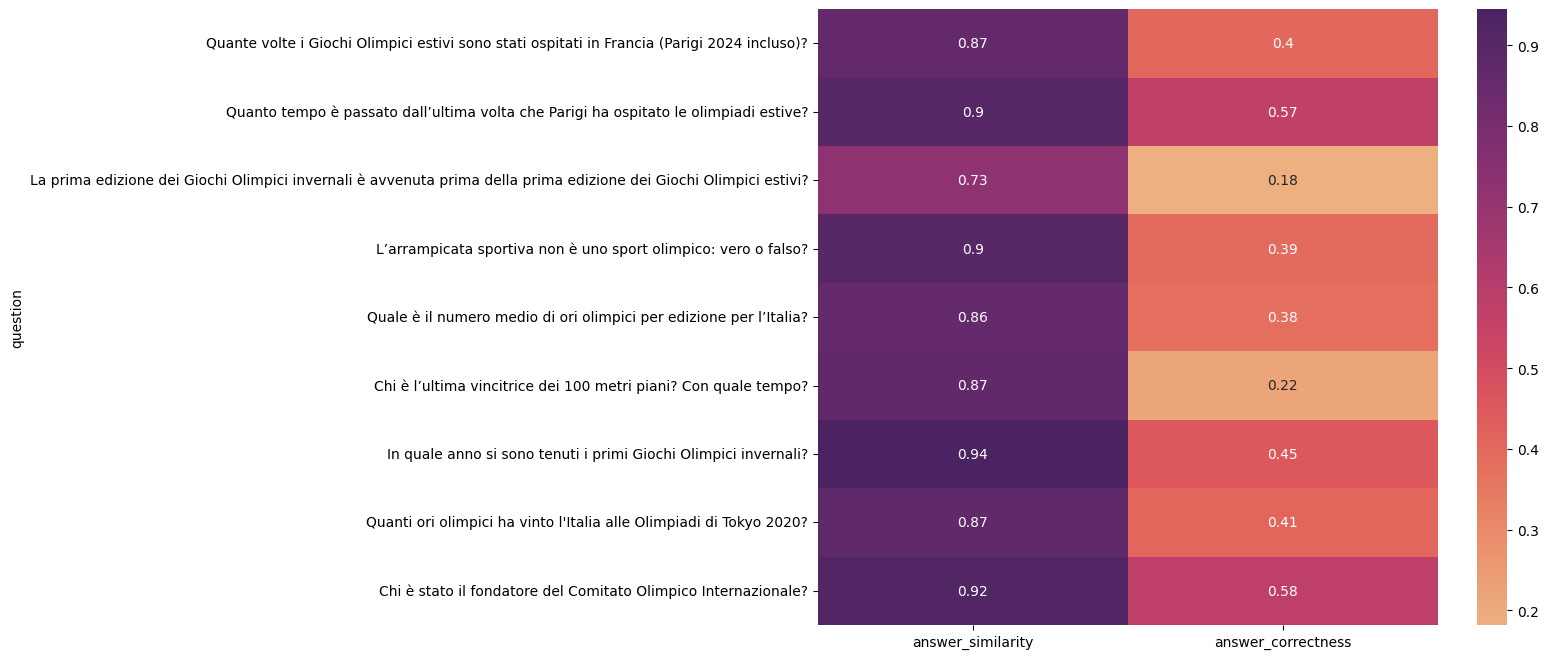

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    result_df[1:10].set_index("question")[["answer_similarity", "answer_correctness"]],
    annot=True,
    cmap="flare",
)
plt.show()

#### Performances with Web Search

In [11]:
# Define the questions and their expanded correct answers
data = {
    "question": [
        "Quale città ospitò i primi Giochi Olimpici estivi dell’età moderna? In che anno?",
        "Quante volte i Giochi Olimpici estivi sono stati ospitati in Francia (Parigi 2024 incluso)?",
        "Quanto tempo è passato dall’ultima volta che Parigi ha ospitato le olimpiadi estive?",
        "La prima edizione dei Giochi Olimpici invernali è avvenuta prima della prima edizione dei Giochi Olimpici estivi?",
        "L’arrampicata sportiva non è uno sport olimpico: vero o falso?",
        "Quale è il numero medio di ori olimpici per edizione per l’Italia?",
        "Chi è l’ultima vincitrice dei 100 metri piani? Con quale tempo?",
        "In quale anno si sono tenuti i primi Giochi Olimpici invernali?",
        "Quanti ori olimpici ha vinto l'Italia alle Olimpiadi di Tokyo 2020?",
        "Chi è stato il fondatore del Comitato Olimpico Internazionale?",
        "Quale città ospiterà i Giochi Olimpici estivi del 2028?",
        "In quale anno le donne hanno partecipato per la prima volta ai Giochi Olimpici?"
    ],
    "ground_truth": [
        "La città che ospitò i primi Giochi Olimpici estivi dell'età moderna fu Atene, in Grecia, nel 1896. Questi Giochi segnarono la rinascita del movimento olimpico dopo secoli di inattività.",
        "I Giochi Olimpici estivi sono stati ospitati in Francia tre volte, includendo Parigi 2024. Le precedenti edizioni si sono tenute a Parigi nel 1900 e nel 1924.",
        "Sono passati 100 anni dall'ultima volta che Parigi ha ospitato le Olimpiadi estive, che si sono tenute nel 1924. Parigi ospiterà di nuovo i Giochi nel 2024.",
        "No, la prima edizione dei Giochi Olimpici invernali non è avvenuta prima della prima edizione dei Giochi Olimpici estivi. I Giochi Olimpici estivi iniziarono nel 1896, mentre i primi Giochi Olimpici invernali si svolsero nel 1924 a Chamonix, Francia.",
        "Falso. L'arrampicata sportiva è diventata uno sport olimpico e ha fatto il suo debutto ai Giochi Olimpici di Tokyo 2020.",
        "L'Italia ha vinto una media di circa 10,5 medaglie d'oro per edizione dei Giochi Olimpici estivi, considerando la sua performance storica nelle Olimpiadi moderne.",
        "L'ultima vincitrice dei 100 metri piani femminili è stata Elaine Thompson-Herah della Giamaica, che ha vinto la medaglia d'oro ai Giochi Olimpici di Tokyo 2020 con un tempo di 10,61 secondi, stabilendo un nuovo record olimpico.",
        "I primi Giochi Olimpici invernali si sono tenuti nel 1924 a Chamonix, in Francia. Questo evento inaugurò la tradizione dei Giochi Olimpici invernali, separati dalle Olimpiadi estive.",
        "L'Italia ha vinto 10 medaglie d'oro alle Olimpiadi di Tokyo 2020, che si sono svolte nel 2021 a causa della pandemia di COVID-19.",
        "Il fondatore del Comitato Olimpico Internazionale (CIO) è stato il barone Pierre de Coubertin, che è considerato il padre delle Olimpiadi moderne. Il CIO fu fondato il 23 giugno 1894.",
        "La città che ospiterà i Giochi Olimpici estivi del 2028 sarà Los Angeles, negli Stati Uniti. Los Angeles ha già ospitato le Olimpiadi nel 1932 e nel 1984.",
        "Le donne hanno partecipato per la prima volta ai Giochi Olimpici nel 1900, durante i Giochi di Parigi. All'epoca, solo alcune discipline erano aperte alla partecipazione femminile."
    ],
    "answer":[]
}

In [12]:
# Create an instance of the WikiRag class
wiki_rag = WikiRag(
    qdrant_url="http://localhost:6333",
    qdrant_collection_name="olympics",
    expand_context=True,
)

c:\Users\Mauro Andretta\anaconda3\envs\wiki_rag_notebooks\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [13]:
for question in data["question"]:
    response = wiki_rag.invoke(query=question)
    print(f"Response generated!")
    data["answer"].append(response)

Response generated!
Response generated!
Response generated!
Response generated!
Response generated!
Response generated!
Response generated!
Response generated!
Response generated!
Response generated!
Response generated!
Response generated!


In [14]:
# show all the answers
data["answer"]

["La città che ospitò i primi Giochi Olimpici estivi dell'età moderna è Atene e ciò avvenne nel 1896.",
 "La risposta è: 3 volte.\n\nSecondo il contesto fornito, Parigi ha già ospitato le Olimpiadi estive nel 1900 e nel 1924. Inoltre, si apprende che la città sarà nuovamente sede delle Olimpiadi estive nel 2024. Quindi, considerando anche l'edizione del 2024, i Giochi Olimpici estivi sono stati ospitati in Francia (a Parigi) per un totale di 3 volte.",
 'La domanda posta dall\'utente è: "Quanto tempo è passato dall’ultima volta che Parigi ha ospitato le olimpiadi estive?"\n\nRisposta:\n\nSecondo il contesto fornito, l\'ultima volta che la Francia ha ospitato i Giochi Olimpici fu nel 1924. Quindi, se consideriamo questo evento come l\'ultima volta che Parigi ha ospitato le olimpiadi estive (come suggerisce il contesto), potremmo calcolare il tempo trascorso dall\'ultima volta che Parigi ha ospitato le olimpiadi estive.\n\nIl contesto fornisce la data dell\'ultima edizione dei Giochi Oli

In [15]:
dataset = Dataset.from_dict(data)

In [16]:
result = evaluate(
    dataset=dataset,
    metrics=[answer_similarity, answer_correctness],
)
print(f"Overall metrics: {result}")

Evaluating: 100%|██████████| 24/24 [00:11<00:00,  2.15it/s]


Overall metrics: {'answer_similarity': 0.9203, 'answer_correctness': 0.6358}


In [17]:
result_df = result.to_pandas()
result_df[result_df["answer_correctness"] < 0.7]

,question,ground_truth,answer,answer_similarity,answer_correctness
0,Quale città ospitò i primi Giochi Olimpici est...,La città che ospitò i primi Giochi Olimpici es...,La città che ospitò i primi Giochi Olimpici es...,0.976280,0.672641
2,Quanto tempo è passato dall’ultima volta che P...,Sono passati 100 anni dall'ultima volta che Pa...,"La domanda posta dall'utente è: ""Quanto tempo ...",0.931903,0.661547
4,L’arrampicata sportiva non è uno sport olimpic...,Falso. L'arrampicata sportiva è diventata uno ...,La risposta è: Falso.\n\nL'arrampicata sportiv...,0.914333,0.478583
5,Quale è il numero medio di ori olimpici per ed...,"L'Italia ha vinto una media di circa 10,5 meda...","Mi dispiace, ma non riesco a fornire una rispo...",0.872685,0.384849
6,Chi è l’ultima vincitrice dei 100 metri piani?...,L'ultima vincitrice dei 100 metri piani femmin...,"Mi dispiace, ma non posso fornire informazioni...",0.908366,0.499819
7,In quale anno si sono tenuti i primi Giochi Ol...,I primi Giochi Olimpici invernali si sono tenu...,La domanda è: In quale anno si sono tenuti i p...,0.958757,0.648780
9,Chi è stato il fondatore del Comitato Olimpico...,Il fondatore del Comitato Olimpico Internazion...,La risposta è: Pierre de Coubertin.,0.870235,0.517559
10,Quale città ospiterà i Giochi Olimpici estivi ...,La città che ospiterà i Giochi Olimpici estivi...,La città ospiterà i Giochi Olimpici estivi del...,0.964306,0.491077
11,In quale anno le donne hanno partecipato per l...,Le donne hanno partecipato per la prima volta ...,La domanda è molto chiara. Le donne hanno part...,0.937827,0.534457


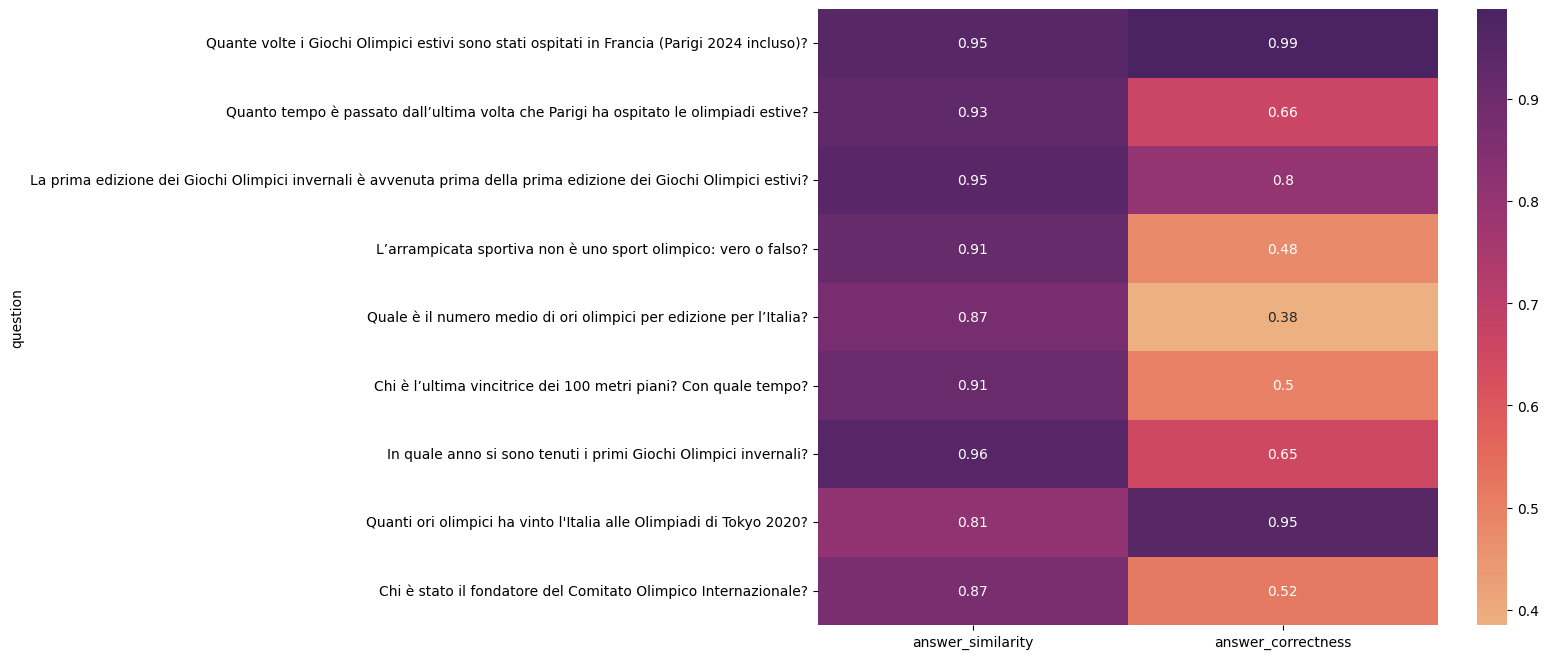

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    result_df[1:10].set_index("question")[["answer_similarity", "answer_correctness"]],
    annot=True,
    cmap="flare",
)
plt.show()